# Imports

In [13]:
import numpy as np
import os
import sys
import pickle
import scipy

## Helper Functions

In [14]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)

import atlasMapping
import fixedDensity as fd

# Set Directory Paths

In [15]:
# Only used to load the FTDGeneralData_20221114.mat file --> Saved as NetworkDataGeneral
%store -r baseDir

# Directory path to load formatted gfap_ferritin_dataDir Data
%store -r gfap_ferritin_dataDir

# Directory path to save Calcualted Analysis Data
%store -r gfap_ferritin_CalData

# Directory path to save Figures
%store -r gfap_ferritin_Fig

In [16]:
graphDir = '/Users/hyroh/Desktop/FTD_Research/mBIN/FTD_JupyterNotebook/GFAP_Ferritin_Analysis/Graphs'

# Loading Data

## Preconstructed Atlas Data

In [17]:
# loads the preconstructed Atlas data
NetworkDataGeneral = scipy.io.loadmat(os.path.join(baseDir, 'NetworkAnalysisGeneral', 'FTDGeneralData_20221114.mat'))

## Covariance Matrices

In [18]:
# covGFAP_TAU_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TAU_Drop.pkl'), 'rb') as f:
    covGFAP_TAU_Drop = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# covGFAP_TDP_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TDP_Drop.pkl'), 'rb') as f:
    covGFAP_TDP_Drop = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# covGFAP_TAU_gt_TDP_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TAU_gt_TDP_Drop.pkl'), 'rb') as f:
    covGFAP_TAU_gt_TDP_Drop = pickle.load(f)
f.close()
# covGFAP_TDP_gt_TAU_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TDP_gt_TAU_Drop.pkl'), 'rb') as f:
    covGFAP_TDP_gt_TAU_Drop = pickle.load(f)
f.close()
#----------------------------------------------------------------------------
# covGFAP_TAU_gt_TDP_raw_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TAU_gt_TDP_raw_Drop.pkl'), 'rb') as f:
    covGFAP_TAU_gt_TDP_raw_Drop = pickle.load(f)
f.close()
# covGFAP_TDP_gt_TAU_raw_Drop
with open(os.path.join(gfap_ferritin_CalData, 'covGFAP_TDP_gt_TAU_raw_Drop.pkl'), 'rb') as f:
    covGFAP_TDP_gt_TAU_raw_Drop = pickle.load(f)
f.close()
#----------------------------------------------------------------------------

## GFAP Log %AO

In [19]:
# GFAP_TAU_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'GFAP_TAU_Drop.pkl'), 'rb') as f:
    GFAP_TAU_Drop = pickle.load(f)
f.close()

# GFAP_TDP_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'GFAP_TDP_Drop.pkl'), 'rb') as f:
    GFAP_TDP_Drop = pickle.load(f)
f.close()

## Labels

In [20]:
# LabelNames_GFAP_TAU_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'LabelNames_GFAP_TAU_Drop.pkl'), 'rb') as f:
    LabelNames_GFAP_TAU_Drop = pickle.load(f)
f.close()

# LabelNames_GFAP_TDP_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'LabelNames_GFAP_TDP_Drop.pkl'), 'rb') as f:
    LabelNames_GFAP_TDP_Drop = pickle.load(f)
f.close()

## CoM

In [21]:
# CoM_GFAP_TAU_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'CoM_GFAP_TAU_Drop.pkl'), 'rb') as f:
    CoM_GFAP_TAU_Drop = pickle.load(f)
f.close()

# CoM_GFAP_TDP_Drop
with open(os.path.join(gfap_ferritin_dataDir, 'CoM_GFAP_TDP_Drop.pkl'), 'rb') as f:
    CoM_GFAP_TDP_Drop = pickle.load(f)
f.close()

# Draw 3D Atlas Map

## Define Variables

### Set fixed density value 

In [22]:
# Count how many edges possible
print(np.count_nonzero(~np.isnan(covGFAP_TAU_gt_TDP_raw_Drop))/2)
print(np.count_nonzero(~np.isnan(covGFAP_TDP_gt_TAU_raw_Drop))/2)

10.0
10.0


In [23]:
fd_val = 5 

### Define Vectors for Node Size and Node Color

In [24]:
# Log %AO of FTD TAU vs TDP
path_TAU_exp = GFAP_TAU_Drop.copy()
path_TDP_exp = GFAP_TDP_Drop.copy()

# Get min/max %AO of LBD
minPath = np.nanmin(np.concatenate((path_TAU_exp.flatten(), path_TDP_exp.flatten())))
maxPath = np.nanmax(np.concatenate((path_TAU_exp.flatten(), path_TDP_exp.flatten())) - minPath + 0.0015, axis=0)

# Size of Nodes --> Marker
markerVecTAU = np.nanmean(path_TAU_exp, axis=0)
markerVecTAU = 3 * (markerVecTAU - minPath) / maxPath

markerVecTDP = np.nanmean(path_TDP_exp, axis=0)
markerVecTDP = 3 * (markerVecTDP - minPath) / maxPath

cRange = [0, 1]

# Node color --> Set as red (because cm.jet: 1 --> Red)
colorVecTAU = np.ones(path_TAU_exp.shape[1])
colorVecTDP = np.ones(path_TDP_exp.shape[1])

## TAU

/Users/hyroh/Desktop/FTD_Research/mBIN/FTD_JupyterNotebook/HelperFunctions/Analysis_HelperFuntions/atlasMapping.py:162: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # Makes the mapping tighter --> Bigger


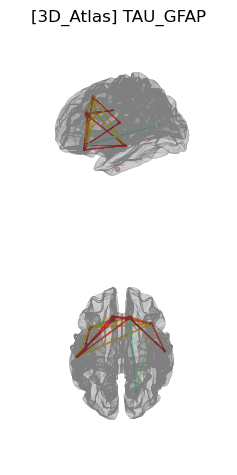

In [25]:
atlasMapping.atlasMapping(NetworkDataGeneral, covGFAP_TAU_Drop, CoM_GFAP_TAU_Drop, LabelNames_GFAP_TAU_Drop, 
                          markerVecTAU, colorVecTAU, gfap_ferritin_Fig, 
                          '[3D_Atlas] TAU_GFAP', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## TDP

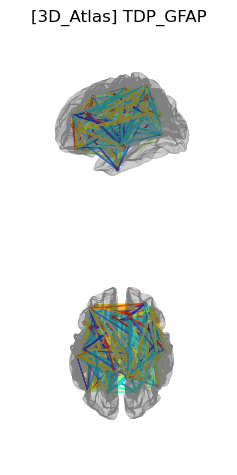

In [26]:
atlasMapping.atlasMapping(NetworkDataGeneral, covGFAP_TDP_Drop, CoM_GFAP_TDP_Drop, LabelNames_GFAP_TDP_Drop, 
                          markerVecTDP, colorVecTDP, gfap_ferritin_Fig, 
                          '[3D_Atlas] TDP_GFAP', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## TAU > TDP

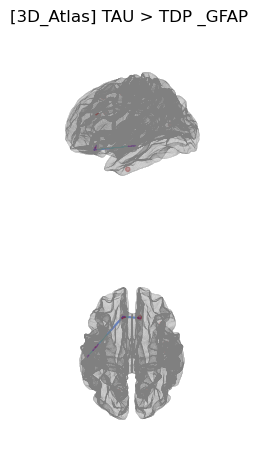

In [27]:
atlasMapping.atlasMapping(NetworkDataGeneral, covGFAP_TAU_gt_TDP_Drop, CoM_GFAP_TAU_Drop, LabelNames_GFAP_TAU_Drop, 
                          markerVecTAU, colorVecTAU, gfap_ferritin_Fig, 
                          '[3D_Atlas] TAU > TDP _GFAP', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### Fixed Density

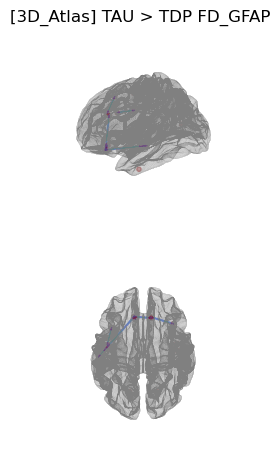

In [30]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(covGFAP_TAU_gt_TDP_raw_Drop, fd_val), 
                          CoM_GFAP_TAU_Drop, LabelNames_GFAP_TAU_Drop, 
                          markerVecTAU, colorVecTAU, gfap_ferritin_Fig, 
                          '[3D_Atlas] TAU > TDP FD_GFAP', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## TDP > TAU

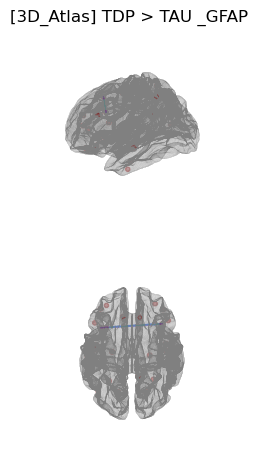

In [31]:
atlasMapping.atlasMapping(NetworkDataGeneral, covGFAP_TDP_gt_TAU_Drop, CoM_GFAP_TDP_Drop, LabelNames_GFAP_TDP_Drop, 
                          markerVecTDP, colorVecTDP, gfap_ferritin_Fig, 
                          '[3D_Atlas] TDP > TAU _GFAP', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

### Fixed Density

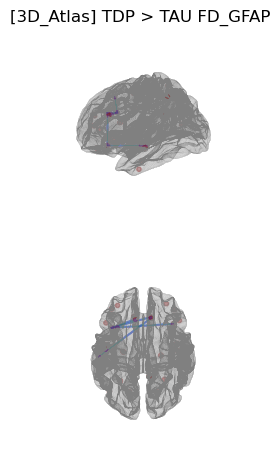

In [32]:
atlasMapping.atlasMapping(NetworkDataGeneral, fd.fixedDensity(covGFAP_TDP_gt_TAU_raw_Drop, fd_val), 
                          CoM_GFAP_TDP_Drop, LabelNames_GFAP_TDP_Drop, 
                          markerVecTDP, colorVecTDP, gfap_ferritin_Fig, 
                          '[3D_Atlas] TDP > TAU FD_GFAP', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)